**Importing libraries**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

**Loading dataset**

In [25]:
df=pd.read_csv("../data/Ecommerce Customers.txt")

**Analysing dataset**

In [26]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**EDA in the dataset**

In [27]:
print(f"rows: {df.shape[0]}, columns: {df.shape[1]}")
print()
print(df.columns)
print()
print(df.info())

rows: 500, columns: 8

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [28]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [29]:
print(df.isnull().sum())

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


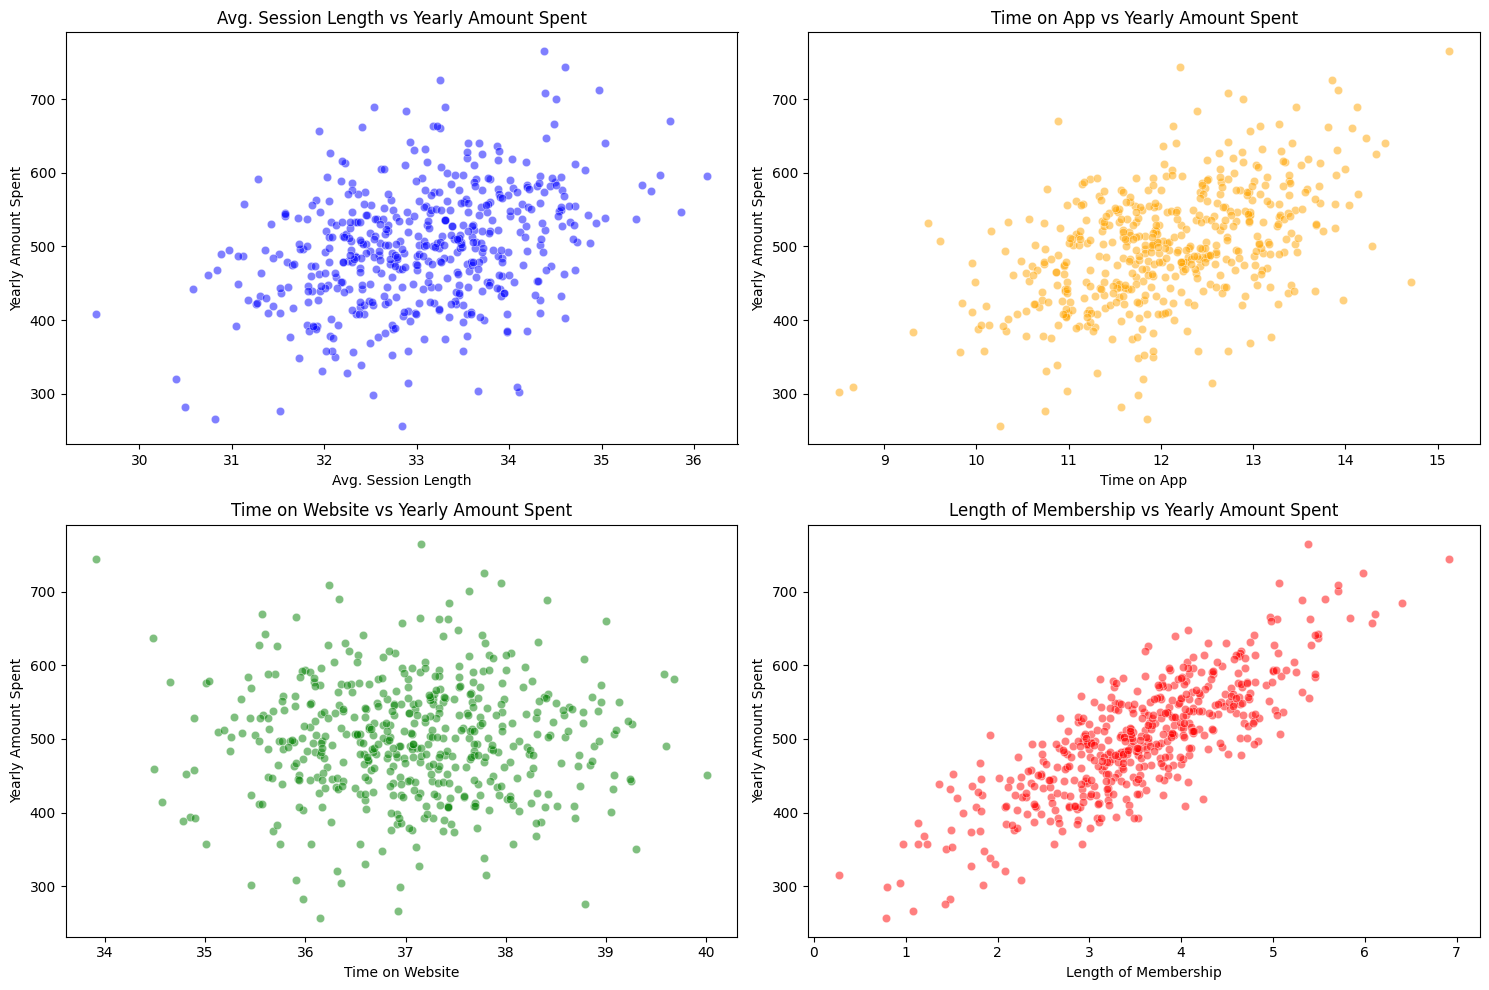

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=df, x="Avg. Session Length", y="Yearly Amount Spent", ax=axes[0, 0], color="blue",alpha=0.5)
axes[0, 0].set_title("Avg. Session Length vs Yearly Amount Spent")
axes[0, 0].set_xlabel("Avg. Session Length")
axes[0, 0].set_ylabel("Yearly Amount Spent")
sns.scatterplot(data=df, x="Time on App", y="Yearly Amount Spent", ax=axes[0, 1], color="orange",alpha=0.5)
axes[0, 1].set_title("Time on App vs Yearly Amount Spent")
axes[0, 1].set_xlabel("Time on App")
axes[0, 1].set_ylabel("Yearly Amount Spent")
sns.scatterplot(data=df, x="Time on Website", y="Yearly Amount Spent", ax=axes[1, 0], color="green",alpha=0.5)
axes[1, 0].set_title("Time on Website vs Yearly Amount Spent")
axes[1, 0].set_xlabel("Time on Website")
axes[1, 0].set_ylabel("Yearly Amount Spent")
sns.scatterplot(data=df, x="Length of Membership", y="Yearly Amount Spent", ax=axes[1, 1], color="red",alpha=0.5)
axes[1, 1].set_title("Length of Membership vs Yearly Amount Spent")
axes[1, 1].set_xlabel("Length of Membership")
axes[1, 1].set_ylabel("Yearly Amount Spent")
plt.tight_layout()
plt.show()


**“From the scatter plots, Length of Membership appears to have the strongest linear relationship with Yearly Amount Spent.”**

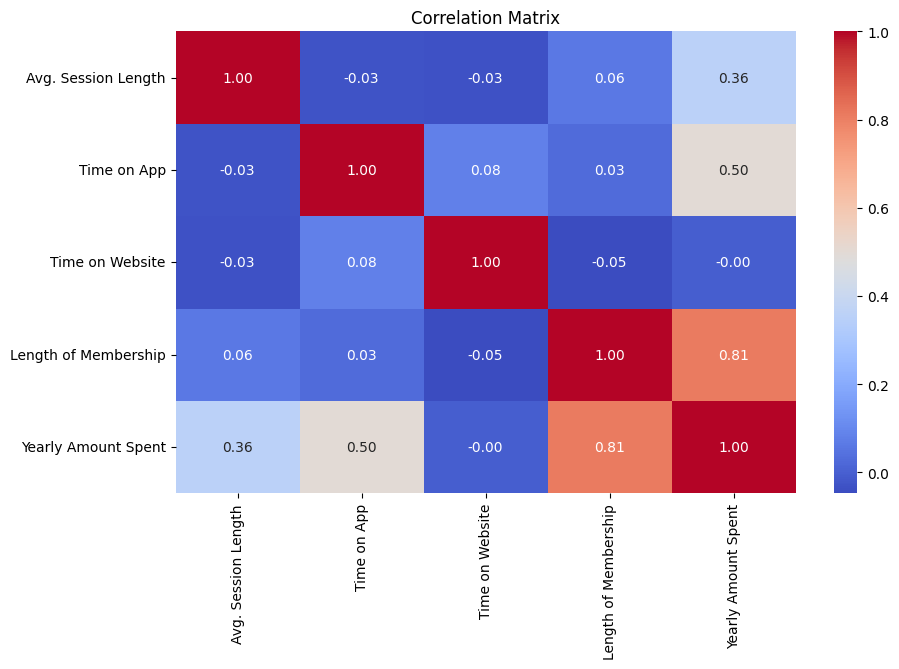

In [31]:
#Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Length of Membership → strongest correlation with target (0.81)

Time on App → moderate correlation (0.50)

Avg. Session Length → weaker but positive (0.36)

Time on Website → almost no correlation (~0)

**From the plots, it appears that "Length of Membership" has the strongest positive correlation with "Yearly Amount Spent".**

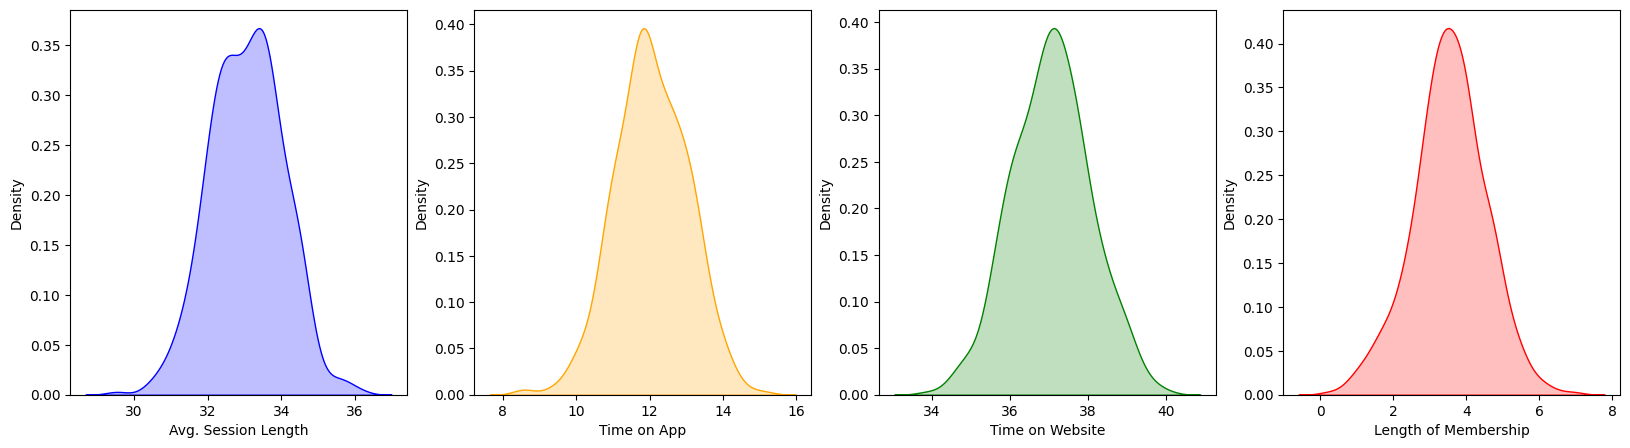

In [32]:
fig,axes=plt.subplots(1,4,figsize=(20,5))
sns.kdeplot(data=df,x="Avg. Session Length",ax=axes[0],color="blue",fill=True)
sns.kdeplot(data=df,x="Time on App",ax=axes[1],color="orange",fill=True)
sns.kdeplot(data=df,x="Time on Website",ax=axes[2],color="green",fill=True)
sns.kdeplot(data=df,x="Length of Membership",ax=axes[3],color="red",fill=True)
plt.show()

**From the distribution plots, we can observe that the features have varying distributions, with some being more normally distributed than others.**

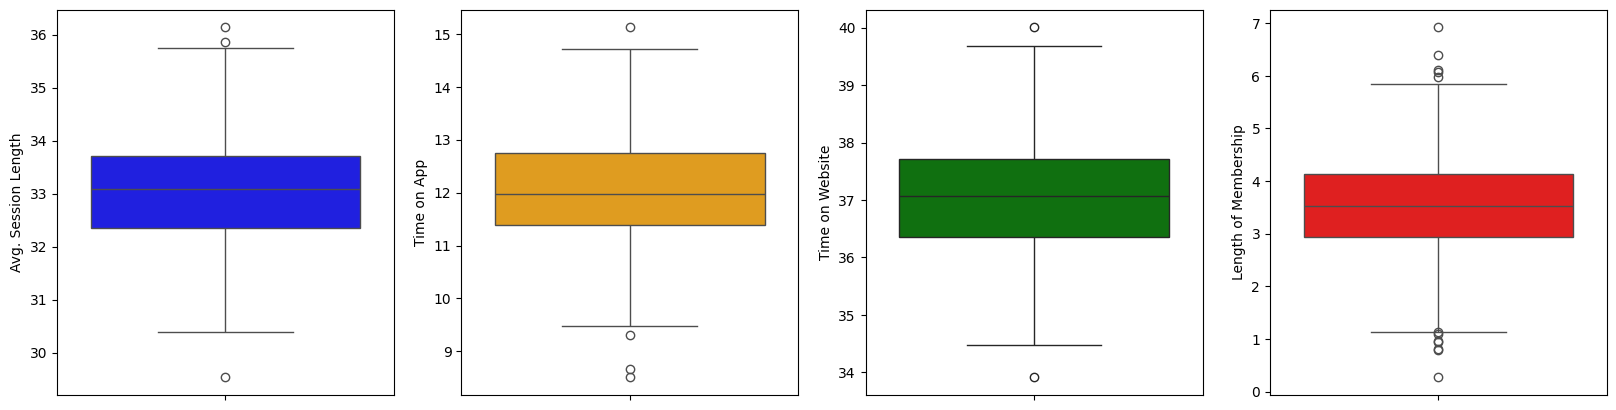

In [33]:
# checking for outliers
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(data=df, y="Avg. Session Length", ax=axes[0], color="blue")
sns.boxplot(data=df, y="Time on App", ax=axes[1], color="orange")
sns.boxplot(data=df, y="Time on Website", ax=axes[2], color="green")
sns.boxplot(data=df, y="Length of Membership", ax=axes[3], color="red")
plt.show()

**The box plots indicate that there are some outliers present in the features, but they do not appear to be extreme and make sense given the context of the data they are not likely to adversely affect the model's performance and they are valid data points.**

**Train-test split before scaling which ensures that the model is evaluated on unseen data and prevents data leakage**

In [34]:
X=df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
y=df["Yearly Amount Spent"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**To transform features so they have a mean of zero and a standard deviation of one. This is a crucial preprocessing step that ensures all features are on a comparable scale, which improves model performance and prevents features with large magnitudes from dominating those with smaller ranges.**

In [35]:
scaler=StandardScaler()
X_train_final=scaler.fit_transform(X_train)
X_test_final=scaler.transform(X_test)

**Training the Model using linear regression**

In [36]:
lr=LinearRegression()
lr.fit(X_train_final,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Evaluating the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) provides insights into how well the linear regression model predicts the target variable. Lower values for these metrics indicate better predictive accuracy.**

In [37]:
from sklearn.metrics import mean_absolute_error,r2_score
y_train_pred=lr.predict(X_train_final)
y_test_pred=lr.predict(X_test_final)
print("R2 Train:",round(r2_score(y_train,y_train_pred),2))
print("Mean Absolute Error Train:",round(mean_absolute_error(y_train,y_train_pred),2))
print("Mean Squared Error Train:",round(mean_squared_error(y_train,y_train_pred),2))
print("Root Mean Squared Error Train:",round(root_mean_squared_error(y_train,y_train_pred),2))
print("="*40)
print("R2 Test:",round(r2_score(y_test,y_test_pred),2))
print("Mean Absolute Error Test:",round(mean_absolute_error(y_test,y_test_pred),2))
print("Mean Squared Error Test:",round(mean_squared_error(y_test,y_test_pred),2))
print("Root Mean Squared Error Test:",round(root_mean_squared_error(y_test,y_test_pred),2))

R2 Train: 0.99
Mean Absolute Error Train: 7.66
Mean Squared Error Train: 96.44
Root Mean Squared Error Train: 9.82
R2 Test: 0.98
Mean Absolute Error Test: 8.43
Mean Squared Error Test: 103.92
Root Mean Squared Error Test: 10.19


**The MAE shows that, on average, predictions differ from actual yearly spending by around ₹7–₹10, which is acceptable for this problem.**

In [38]:
# Calculate Adjusted R²
n_train = X_train_final.shape[0]
p = X_train_final.shape[1]
adjusted_r2_train = 1 - (1 - r2_score(y_train, y_train_pred)) * (n_train - 1) / (n_train - p - 1)
n_test = X_test_final.shape[0]
adjusted_r2_test = 1 - (1 - r2_score(y_test, y_test_pred)) * (n_test - 1) / (n_test - p - 1)
print(f"Adjusted R² Train: {adjusted_r2_train:.2f}")
print(f"Adjusted R² Test: {adjusted_r2_test:.2f}")

Adjusted R² Train: 0.99
Adjusted R² Test: 0.98


**Adjusted R² values of 0.99 for training and 0.98 for testing indicate that the model explains a very high proportion of variance in yearly spending, suggesting excellent predictive performance without significant overfitting.**

In [39]:
coef_df=pd.DataFrame({"Feature":X.columns,"Coefficient":lr.coef_})  
coef_df.sort_values(by="Coefficient",ascending=False)

,Feature,Coefficient
3,Length of Membership,63.353471
1,Time on App,38.743243
0,Avg. Session Length,25.468114
2,Time on Website,0.468548


**As we can see our cofficients, Length of Membership has the highest positive impact on Yearly Amount Spent, followed by Time on App, Avg. Session Length, and Time on Website.**

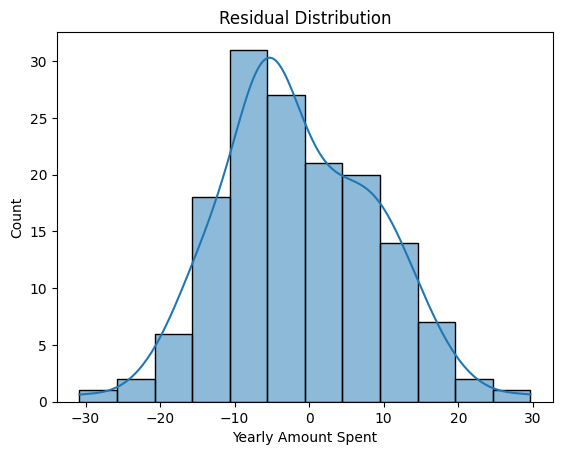

In [40]:
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

**Our reisdual plot shows a fairly normal distribution of errors, indicating that our linear regression model is appropriate for this data.**

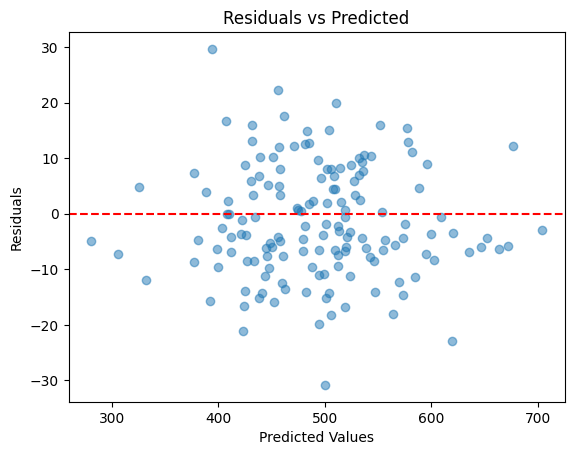

In [41]:
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

**Our residuals and predicted values are randomly scattered around zero, indicating that our linear regression model is appropriate for this data.**

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X_train_final, y_train, cv=5, scoring='r2')
print("CV Mean R2:", cv_scores.mean())
print("CV Std:", cv_scores.std())

CV Mean R2: 0.9847830118328931
CV Std: 0.0030363058550748577


**By validating cv scores, we ensure our model's robustness and generalizability, confirming it performs consistently across different data subsets.**

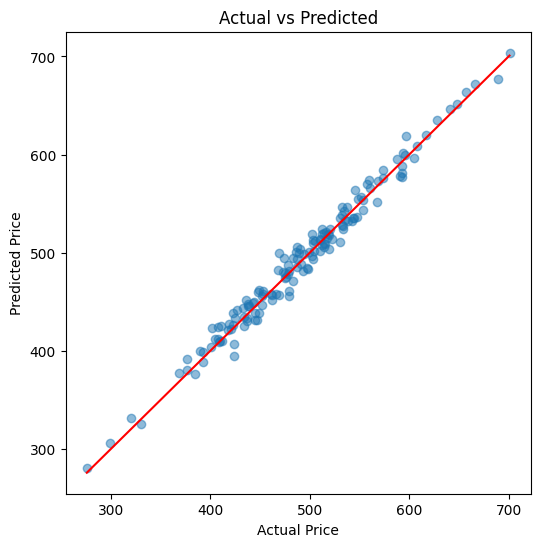

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

**We can see our actual price vs predicted price is very close to the diagonal line, indicating a good fit of our linear regression model.**

In [44]:
import joblib
joblib.dump(lr, "../model/linear_model.joblib")
joblib.dump(scaler, "../model/scaler.joblib")

['../model/scaler.joblib']

# Business Insights

Length of Membership is the strongest indicator of yearly spending.
Customers who stay longer tend to spend significantly more.
→ The business should focus on customer retention programs.

Time spent on the App correlates more with spending than Time on Website.
→ Investing in better mobile app experience can directly increase sales.
→ Push notifications, offers, app-exclusive deals may boost revenue.

Customers with higher engagement in digital platforms spend more.
→ Personalization, recommendations, gamification might increase spending.

Low error rate and high R² mean predictions are reliable for financial planning:

Revenue forecasting

Customer segmentation

Predicting high-value customers early

Since model generalized well (Train ≈ Test), it can be used in production safely.

# Conclusion

This project successfully built and evaluated a Linear Regression model to predict annual customer spending. After performing EDA, visual analysis, splitting the data, encoding categorical features, scaling numerical features, and training the model, we achieved:

Train R²: ~0.99
Test R²: ~0.98
MAE: ~7–8

Residuals showed a near-normal distribution and scatter plots indicated no visible pattern, confirming that linear regression assumptions are satisfied.
Cross-validation further validated the model’s stability with consistent scores.
The model is saved using joblib and is ready for integration in a Streamlit UI for deployment.

Customer Length of Membership and App usage time were the most influential features, meaning longer retention and increased app engagement strongly boost yearly spending.
This provides valuable business insights for strategic decisions focused on retention, app experience, digital engagement, and loyalty programs.

Overall, the model performs exceptionally well and can reliably predict customer spending for business decision-making and revenue forecasting.